## Importing Essential Libraries

In [3]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Data PreProcessing

#LoadData

In [76]:
df = pd.read_csv('train.csv')
df = df.drop(columns=['Unnamed: 0'])
print(df.head())

       id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0         

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
# Handling Null values
df.isnull().sum()

In [78]:
# Dropping null values
df = df.dropna()

In [ ]:
df.isnull().sum()

In [11]:
# Manage duplicate values
df.duplicated().sum() 
# No duplicate values


0

### Manage Outliers

In [79]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outliers as those falling outside 1.5*IQR
outliers = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

# Print the number of outliers per column
print(outliers.sum())

id                                       0
Age                                      0
Flight Distance                       2287
Inflight wifi service                    0
Departure/Arrival time convenient        0
Ease of Online booking                   0
Gate location                            0
Food and drink                           0
Online boarding                          0
Seat comfort                             0
Inflight entertainment                   0
On-board service                         0
Leg room service                         0
Baggage handling                         0
Checkin service                      12853
Inflight service                         0
Cleanliness                              0
Departure Delay in Minutes           14428
Arrival Delay in Minutes             13954
dtype: int64


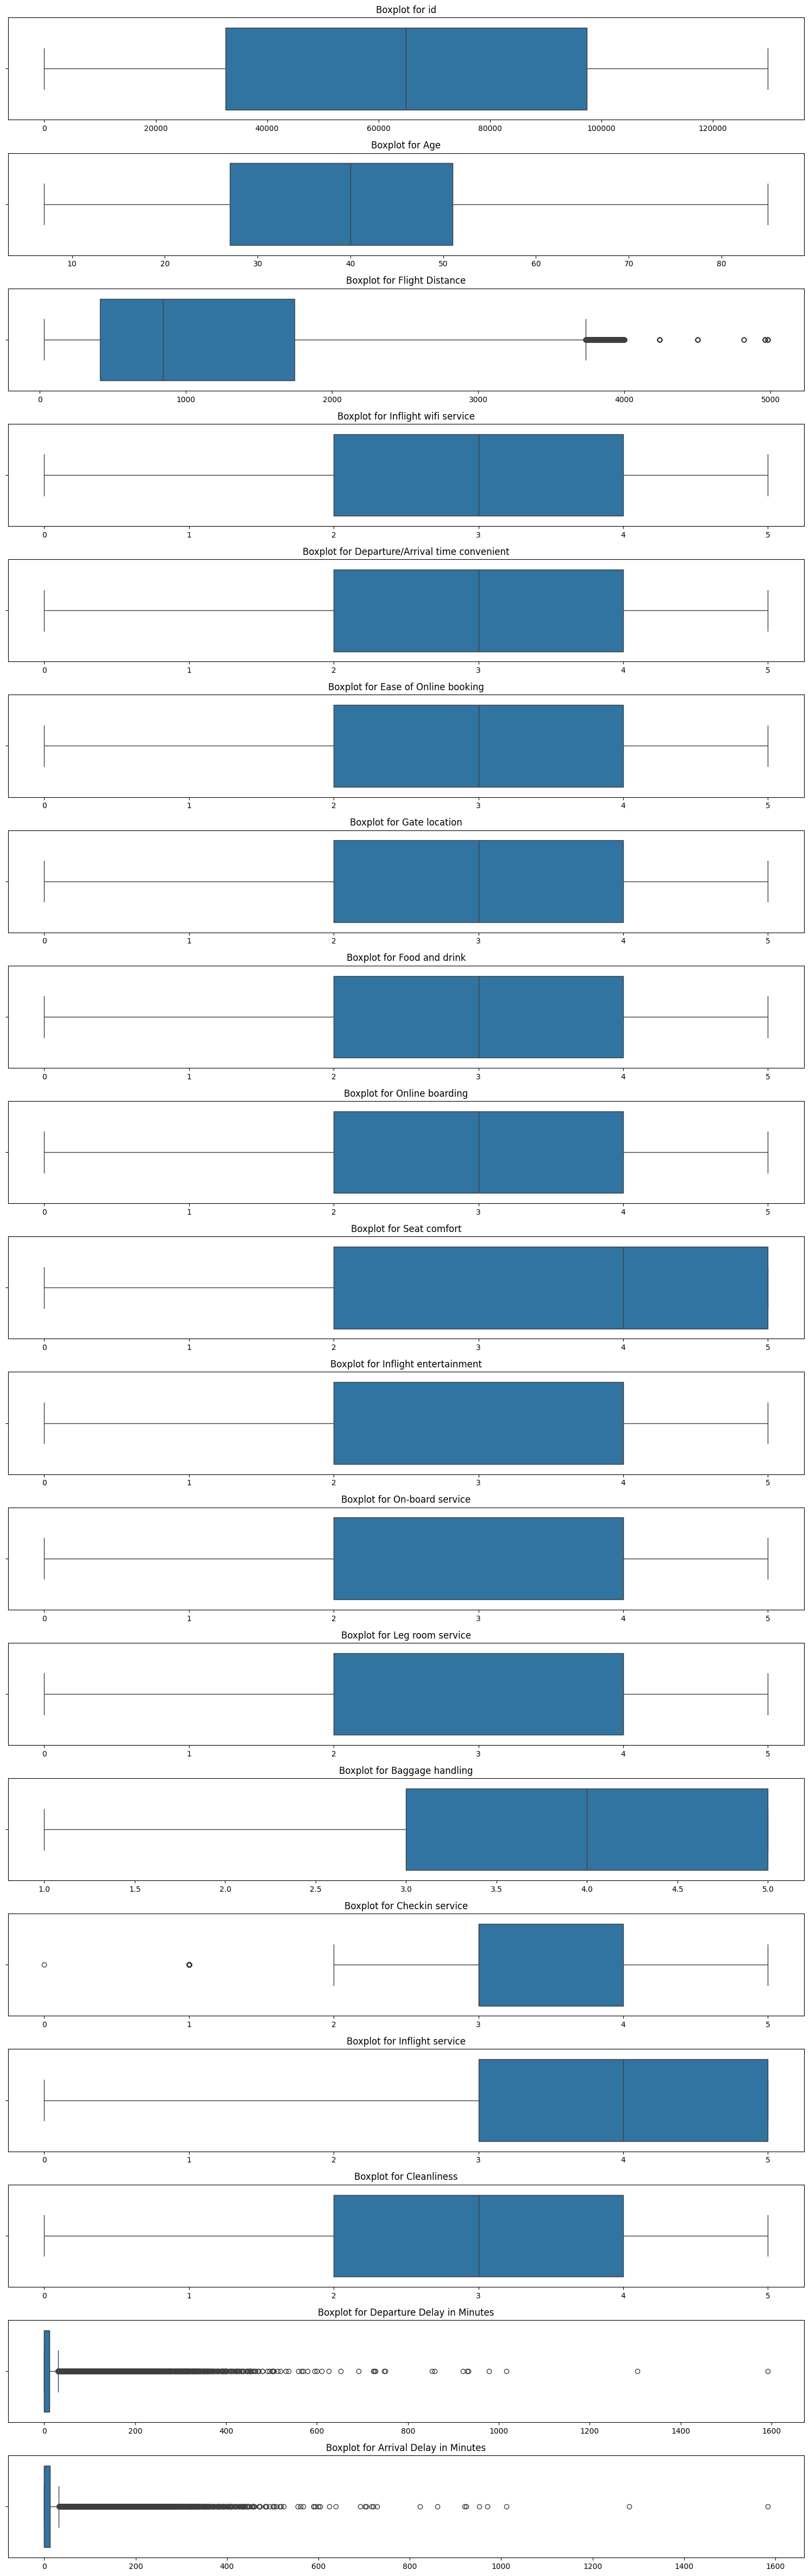

In [74]:
# we have to treat 4 coloumns as outliers
# Removing outlier is not a good option as it will affect the accuracy of the model due to high number of outliers
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create subplots with a number of rows equal to the number of numeric columns
fig, axs = plt.subplots(len(numeric_cols), 1, figsize=(15, len(numeric_cols) * 2.5))

# Ensure axs is iterable, even if there's only one numeric column
if len(numeric_cols) == 1:
    axs = [axs]

# Plot each numeric column in a separate subplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(f'Boxplot for {col}')
    axs[i].set_xlabel('')  # Optional: remove x-axis label for cleaner plots

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [83]:


# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.90)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define critical outliers as those falling outside 3*IQR (a more conservative threshold)
critical_outliers = (df[numeric_cols] < (Q1 - 3 * IQR)) | (df[numeric_cols] > (Q3 + 3 * IQR))

# Remove rows with critical outliers in any numeric column
df_critical_clean = df[~critical_outliers.any(axis=1)]

# Print the number of remaining records
print(f"Remaining records after critical outlier removal: {df_critical_clean.shape[0]}")

# Optionally, check how many critical outliers were removed per column
critical_outliers_per_column = critical_outliers.sum()
print("Critical outliers per column:\n", critical_outliers_per_column)



Remaining records after critical outlier removal: 102328
Critical outliers per column:
 id                                      0
Age                                     0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes           1106
Arrival Delay in Minutes             1152
dtype: int64


## Capping

Number of records after capping: 103594


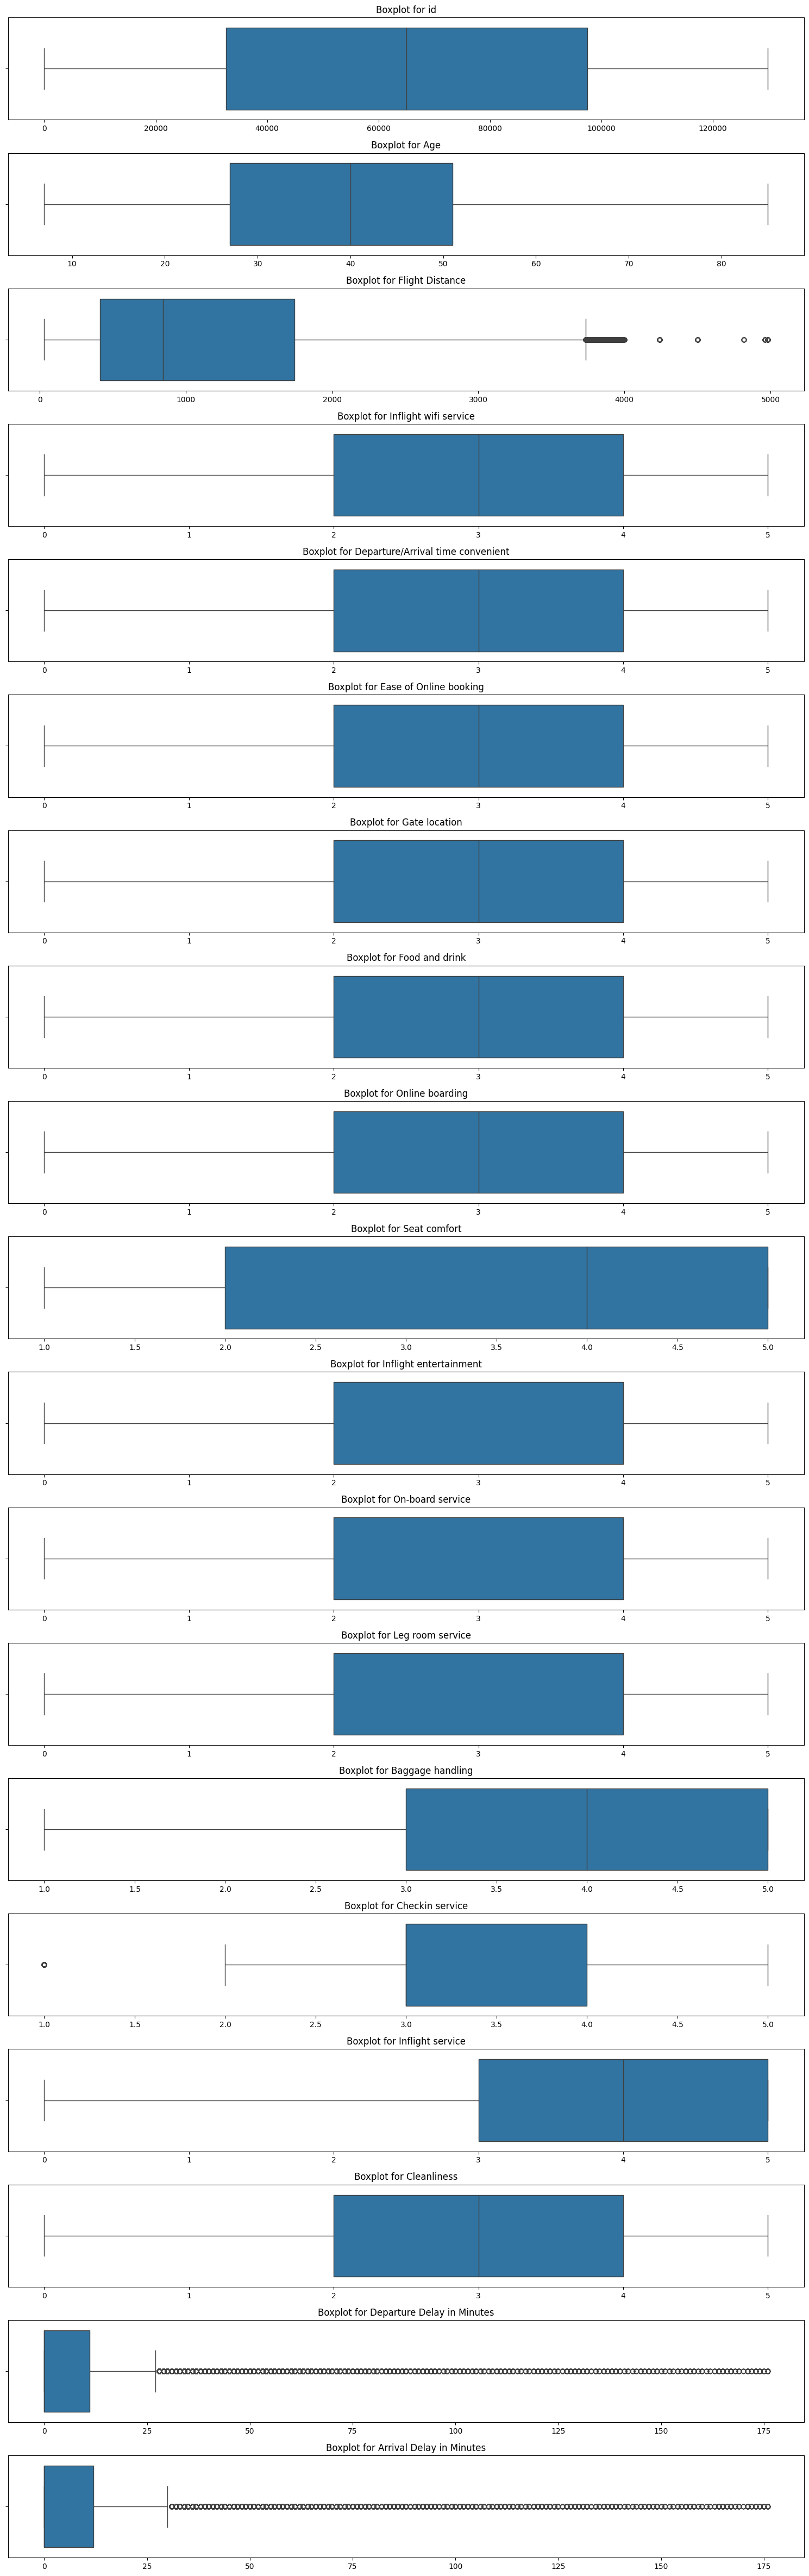

In [101]:

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the lower and upper bounds for capping (1st and 99th percentiles)
lower_bound = df[numeric_cols].quantile(0.25)
upper_bound = df[numeric_cols].quantile(0.75)

# Cap the outliers
df_capped = df.copy()
df_capped[numeric_cols] = df_capped[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Print the number of records to confirm no rows were removed
print(f"Number of records after capping: {df_capped.shape[0]}")

###################################################################################

# we have to treat 4 coloumns as outliers
# Removing outlier is not a good option as it will affect the accuracy of the model due to high number of outliers
# Select numeric columns
numeric_cols = df_critical_clean.select_dtypes(include=[np.number]).columns

# Create subplots with a number of rows equal to the number of numeric columns
fig, axs = plt.subplots(len(numeric_cols), 1, figsize=(15, len(numeric_cols) * 2.5))

# Ensure axs is iterable, even if there's only one numeric column
if len(numeric_cols) == 1:
    axs = [axs]

# Plot each numeric column in a separate subplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_critical_clean, x=col, ax=axs[i])
    axs[i].set_title(f'Boxplot for {col}')
    axs[i].set_xlabel('')  # Optional: remove x-axis label for cleaner plots

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


##### Note:
##### We have 2 set of formats of data and we are processing removing outliers df_critical_clean 

### Feature Scaling

In [85]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# Select numeric columns

# Separate numeric and categorical columns
numeric_cols = df_critical_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_critical_clean.select_dtypes(include=['object']).columns

# Scale only the numeric columns
sc = StandardScaler()
df_scaled_numeric = sc.fit_transform(df_critical_clean[numeric_cols])

# Convert scaled numeric data back to a DataFrame
df_scaled_numeric = pd.DataFrame(df_scaled_numeric, columns=numeric_cols)

# Combine scaled numeric columns with the original categorical columns
df_scaled = pd.concat([df_scaled_numeric, df_critical_clean[categorical_cols].reset_index(drop=True)], axis=1)

# Optionally, if you need to encode the categorical columns, use this:
# df_scaled = pd.get_dummies(df_scaled, columns=categorical_cols)

# Print the resulting DataFrame
print(df_scaled.head())


         id       Age  Flight Distance  Inflight wifi service  \
0  0.137368 -1.746465        -0.731009               0.202820   
1 -1.601222 -0.952391        -0.956660               0.202820   
2  1.201371 -0.886218        -0.047035              -0.549933   
3 -1.094555 -0.952391        -0.628714              -0.549933   
4  1.448872  1.429833        -0.977721               0.202820   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                           0.616219                0.173147      -1.546322   
1                          -0.694699                0.173147       0.018395   
2                          -0.694699               -0.541512      -0.763963   
3                           1.271677                1.602465       1.583112   
4                          -0.039240                0.173147       0.018395   

   Food and drink  Online boarding  Seat comfort  ...  Checkin service  \
0        1.350727        -0.185952      1.181976  ...       

### Encoding

In [86]:
# Handle categorical columns
# we have use Label Encoding here

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate numeric and categorical columns
numeric_cols = df_critical_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_critical_clean.select_dtypes(include=['object']).columns

# Initialize LabelEncoder for categorical columns
label_encoders = {}
df_encoded = df_critical_clean.copy()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_critical_clean[col])
    label_encoders[col] = le  # Store the encoder for inverse_transform if needed

# Scale only the numeric columns
sc = StandardScaler()
df_scaled_numeric = sc.fit_transform(df_encoded[numeric_cols])

# Convert scaled numeric data back to a DataFrame
df_scaled_numeric = pd.DataFrame(df_scaled_numeric, columns=numeric_cols)

# Combine scaled numeric columns with the encoded categorical columns
df_final = pd.concat([df_scaled_numeric, df_encoded[categorical_cols].reset_index(drop=True)], axis=1)

# Print the resulting DataFrame
print(df_final.head())



         id       Age  Flight Distance  Inflight wifi service  \
0  0.137368 -1.746465        -0.731009               0.202820   
1 -1.601222 -0.952391        -0.956660               0.202820   
2  1.201371 -0.886218        -0.047035              -0.549933   
3 -1.094555 -0.952391        -0.628714              -0.549933   
4  1.448872  1.429833        -0.977721               0.202820   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                           0.616219                0.173147      -1.546322   
1                          -0.694699                0.173147       0.018395   
2                          -0.694699               -0.541512      -0.763963   
3                           1.271677                1.602465       1.583112   
4                          -0.039240                0.173147       0.018395   

   Food and drink  Online boarding  Seat comfort  ...  Checkin service  \
0        1.350727        -0.185952      1.181976  ...       

### Feature Selection

id                                   float64
Age                                  float64
Flight Distance                      float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Gender                                 int32
Customer Type                          int32
Type of Travel                         int32
Class     

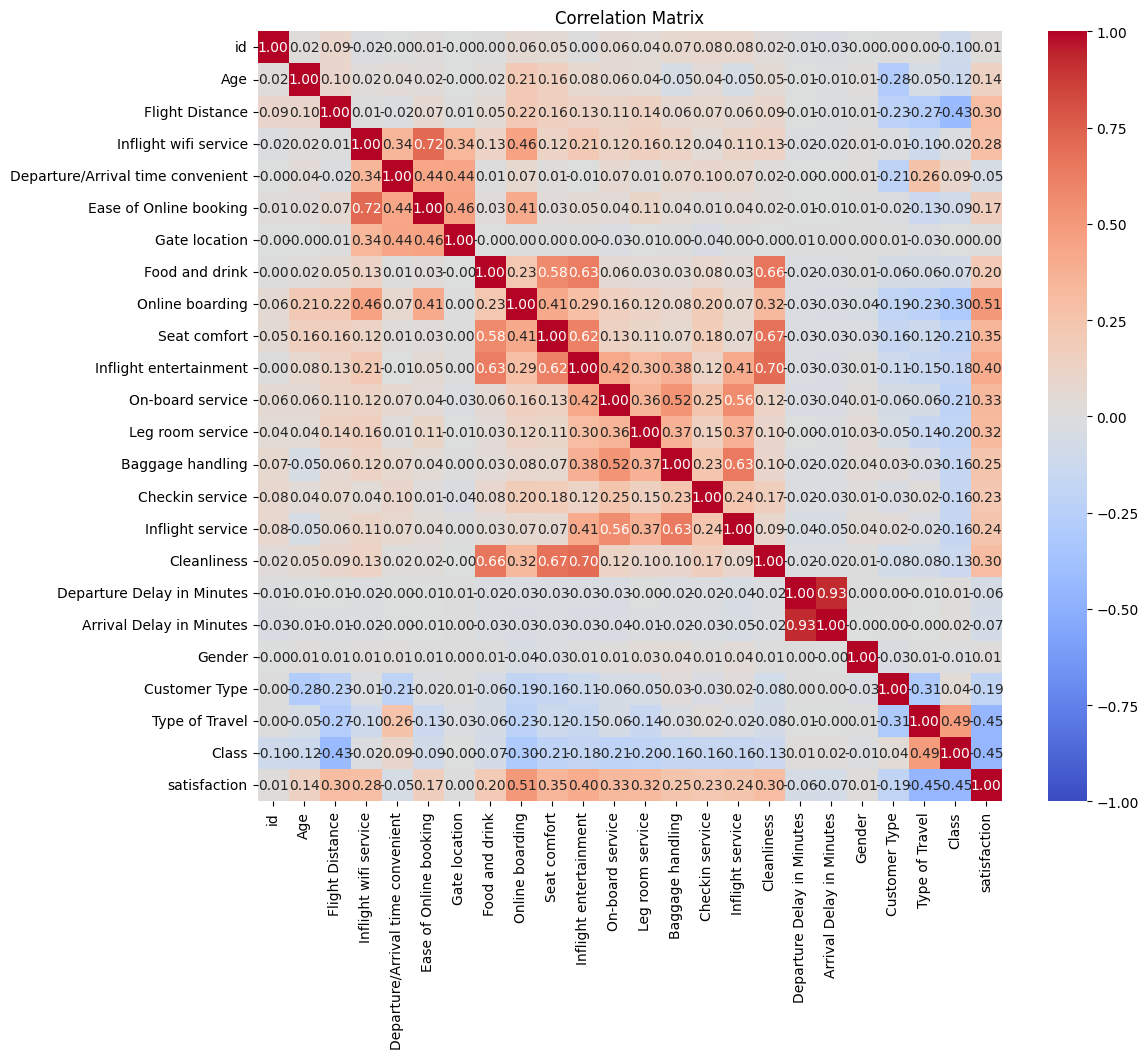

Strong correlations (>|0.5|):
                             Inflight wifi service  Ease of Online booking  \
Inflight wifi service                         NaN                0.716766   
Ease of Online booking                   0.716766                     NaN   
Food and drink                                NaN                     NaN   
Online boarding                               NaN                     NaN   
Seat comfort                                  NaN                     NaN   
Inflight entertainment                        NaN                     NaN   
On-board service                              NaN                     NaN   
Baggage handling                              NaN                     NaN   
Inflight service                              NaN                     NaN   
Cleanliness                                   NaN                     NaN   
Departure Delay in Minutes                    NaN                     NaN   
Arrival Delay in Minutes                     

In [102]:
# Check the data types of each column to ensure numeric types are correctly set
print(df_final.dtypes)

# If you have categorical columns, ensure they are encoded as numeric
# (Already done before using One-Hot Encoding)

# Recalculate the correlation matrix
corr_matrix = df_final.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Filter strong correlations
threshold = 0.5  # Choose the threshold that makes sense for your use case
strong_corrs = corr_matrix[abs(corr_matrix) > threshold]

# Print strong correlations, excluding self-correlations (1.0)
strong_corrs = strong_corrs[strong_corrs != 1.0].dropna(how='all', axis=0).dropna(how='all', axis=1)
print("Strong correlations (>|0.5|):\n", strong_corrs)


In [89]:
print(df_final.columns.tolist())


['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


### Check for Imbalance Data

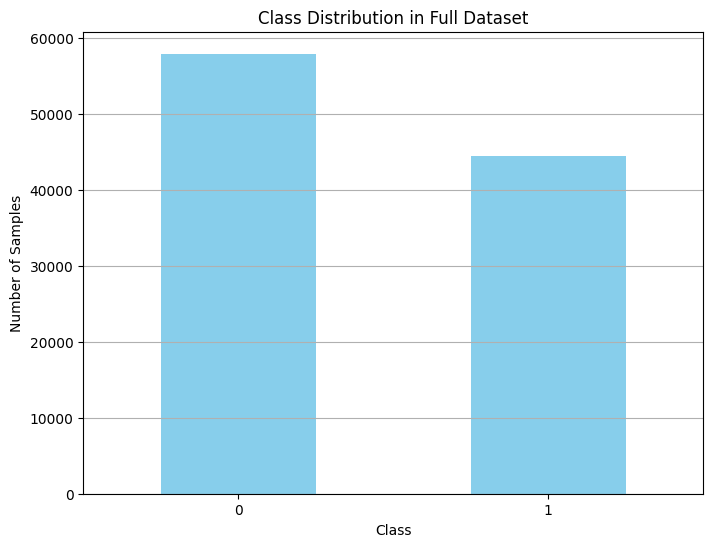

In [99]:
# To check the class distribution for the full dataset 
# Since data set is approximately balanced, we can use the same class distribution

# class distribution for the full dataset
class_distribution_full = df_final['satisfaction'].value_counts()

# Plot 
plt.figure(figsize=(8, 6))
class_distribution_full.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Full Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [100]:
selected_features = [
    
    'Ease of Online booking',
    'Food and drink',
    'Online boarding',
    'Leg room service',
    'Inflight wifi service',
    'Flight Distance',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Cleanliness',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Customer Type',
    'Type of Travel',
    'Class'
]



# Create a new DataFrame with selected features and the target variable
X = df_final[selected_features]
y = df_final['satisfaction']  #  target variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)